<a href="https://colab.research.google.com/github/francomedin/Python-Trading-Algoritmico/blob/main/Indicadores%20Rentabilidad-Riesgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Asumimos una estrategia de buy and hold

In [2]:
import pandas as pd
import numpy as np
#Matplotlib
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('ggplot')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
data=pd.read_csv('/content/drive/MyDrive/Datos Colab/BTC_USD Bitfinex Historical Data.csv')

In [47]:
data['Date']=pd.to_datetime(data['Date'])

In [49]:
data=data.set_index('Date')
data=data.sort_values('Date')

In [48]:
data['Change %'] = data['Change %'].str.replace(r'%', r'').astype('float') / 100.0
data

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-12-29,"47,712.0","47,554.0","48,166.0","46,655.0",4.05K,0.0033
1,2021-12-28,"47,554.0","50,684.0","50,710.0","47,339.0",5.43K,-0.0618
2,2021-12-27,"50,684.0","50,797.0","52,027.0","50,483.0",3.52K,-0.0022
3,2021-12-26,"50,797.0","50,435.2","51,281.0","49,473.0",2.90K,0.0071
4,2021-12-25,"50,437.0","50,815.0","51,169.0","50,209.0",1.99K,-0.0074
...,...,...,...,...,...,...,...
1122,2018-12-03,"3,901.2","4,172.9","4,178.5","3,836.2",36.86K,-0.0621
1123,2018-12-02,"4,159.7","4,241.4","4,353.2","4,127.2",24.40K,-0.0196
1124,2018-12-01,"4,243.0","4,043.6","4,339.0","3,978.8",27.50K,0.0507
1125,2018-11-30,"4,038.3","4,323.3","4,357.4","3,966.2",42.38K,-0.0637


In [76]:
data['Price'] = data['Price'].str.replace('.','')
data['Price'] = data['Price'].str.replace(',','.')
data['Price'] = data['Price'].astype(float)

data

,Price,Open,High,Low,Vol.,Change %,retorno_diario
Date,,,,,,,
2018-11-29,4.3129,"4,331.4","4,472.0","4,180.6",41.10K,0.0015,NaN
2018-11-30,4.0383,"4,323.3","4,357.4","3,966.2",42.38K,-0.0637,-43.466667
2018-12-01,4.2430,"4,043.6","4,339.0","3,978.8",27.50K,0.0507,-1.795918
2018-12-02,4.1597,"4,241.4","4,353.2","4,127.2",24.40K,-0.0196,-1.386588
2018-12-03,3.9012,"4,172.9","4,178.5","3,836.2",36.86K,-0.0621,2.168367
...,...,...,...,...,...,...,...
2021-12-25,50.4370,"50,815.0","51,169.0","50,209.0",1.99K,-0.0074,-75.000000
2021-12-26,50.7970,"50,435.2","51,281.0","49,473.0",2.90K,0.0071,-1.959459
2021-12-27,50.6840,"50,797.0","52,027.0","50,483.0",3.52K,-0.0022,-1.309859


In [77]:
def CAGR(DF):
  df=DF.copy()
  df['Retorno diario']=df['Price'].pct_change()

  df['retorno_acumulado']= ( 1 + df['Retorno diario']).cumprod() 
  
  anios=len(df)/360

  CAGR=(df['retorno_acumulado'][1126])**(1/anios) -1
  
  return CAGR

In [78]:
CAGR(data)

1.154973078993757

Nuesto CAGR es de 115,49%

## Volatilidad Anual

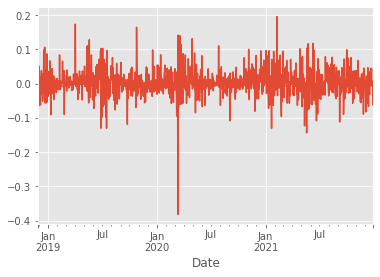

In [55]:
data['Change %'].plot()

In [79]:
def Volatility(DF):
  df=DF.copy()
  df['retorno_diario']=df['Price'].pct_change()
  
  #Obtenemos el std diario
  vol=df['retorno_diario'].std() * np.sqrt(360)

  return vol

In [80]:
Volatility(data[data.index>'2020-12-12'])

0.8007022910342102

Volatilidad Anual de Btc desde 2018-11-29 es del 80%

In [81]:
data[data.index>'2020-12-12']
del(data['retorno_diario'])


In [82]:
data['retorno_diario']=data['Price'].pct_change()


## Sharpe Ratio y Sortino Ratio

In [87]:
def Sharpe(DF, risk_free_rate= 0.0171):
  df=DF.copy()
  sharpe_ratio=(CAGR(df) - risk_free_rate)/Volatility(df)
  return sharpe_ratio

In [88]:
Sharpe(data)

1.522712988954975

In [90]:
def Sortino_ratio(DF, risk_free_rate= 0.0171):
  df=DF.copy()
  df['retorno_diario2']=df['Price'].pct_change()
  neg_vol=df[df['retorno_diario2'] < 0]['retorno_diario2'].std() * np.sqrt(360)
  sortino_ratio=(CAGR(df) - risk_free_rate) / neg_vol
  return sortino_ratio


In [91]:
Sortino_ratio(data)

2.0573987041508706

In [101]:
df_2020_2021=data.loc[(data.index>='2020-01-01') & (data.index<= '2020-12-01')]

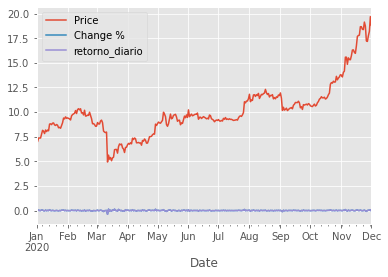

In [102]:
df_2020_2021.plot()

### Maximo DrawDown y Calmar Ratio

In [105]:
def MDD(DF):
  df=DF.copy()
  df['retorno_diario']=df['Price'].pct_change()
  df['retorno_acumulado']=(1  + df['retorno_diario']).cumprod()
  df['max_ret_acu']= df['retorno_acumulado'].cummax()
  df['draw_down']=df['max_ret_acu'] - df['retorno_acumulado']
  df['draw_down_pct']=df['draw_down'] / df['max_ret_acu']
  mdd=df['draw_down_pct'].max()
  return mdd


In [106]:
MDD(data)

0.6173501087294191

El Maximo drawn Down es 61.73%

In [108]:
#Calmar Ratio
def Calmar(DF):
  df=DF.copy()
  calmar=CAGR(df) / MDD(df)
  return calmar

In [109]:
Calmar(data)

1.8708558768554049